<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 11

In [2]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [3]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names

In [4]:
targets

array([7, 4, 4, ..., 3, 1, 8])

Print off the first document and its target classification to make sure its been downloaded correctly 

In [5]:
#Enter code here.
print(docs[0])
print()
print(targets[0])
print()
print(names[7])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






7

rec.autos


In [6]:
print(docs[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. Specifically, plot a bar chart showing distribution of the categories (classes)

([<matplotlib.axis.XTick at 0x18b02488d88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

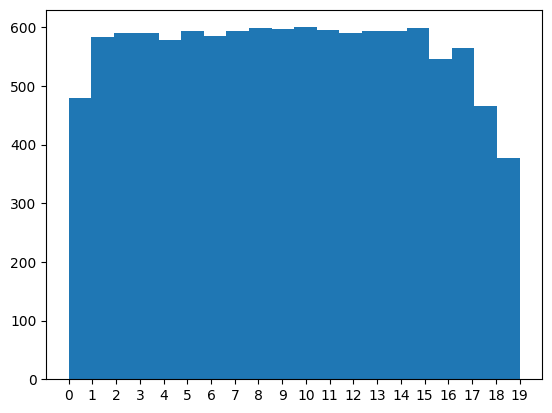

In [7]:
# Enter code here
df = pd.DataFrame({'docs':docs,
                   'targets':targets
                   })
df
plt.hist(targets, bins=20)
plt.xticks(range(0,20))
# len(df['targets'])

In [8]:
Y, X = np.unique(targets, return_counts=True)
Y
X

array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
       594, 593, 599, 546, 564, 465, 377], dtype=int64)

## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [9]:
# Enter code here to engineer the data
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
X = docs
y = targets

In [11]:
cv = CountVectorizer()
X = cv.fit_transform(docs)
# X = X.toarray()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
X = docs
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

## Exercise 4: Split the Data

Split your data into train and test splits. Use an 80%/20% split rule for train and test respectively. I'd recommend using the function from the last lab

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.2)

In [16]:
xTrain.shape

(9051, 130107)

In [17]:
xTest.shape

(2263, 130107)

## Exercise 5: Train the Model

Using sklearn, train the following three classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression

In [18]:
# Train the model using the KNN Cluster Algorithm
# Enter your code for Exercise 4 here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn = knn.fit(xTrain, yTrain)

print('n neighbors = 5:')
print('train score:', knn.score(xTrain, yTrain))
print('test score:', knn.score(xTest, yTest))
print()

neighbors = []
train_scores = []
test_scores = []
# for i in range(1,21):
#   knn = KNeighborsClassifier(n_neighbors = i)

#   knn.fit(xTrain, yTrain)

#   neighbors.append(i)
#   train_scores.append(knn.score(xTrain, yTrain))
#   test_scores.append(knn.score(xTest, yTest))
#   print('n neighbors:', i)
#   print('train score:', knn.score(xTrain, yTrain))
#   print('test score:', knn.score(xTest, yTest))
#   print()

n neighbors = 5:
train score: 0.8669760247486465
test score: 0.7688908528501989



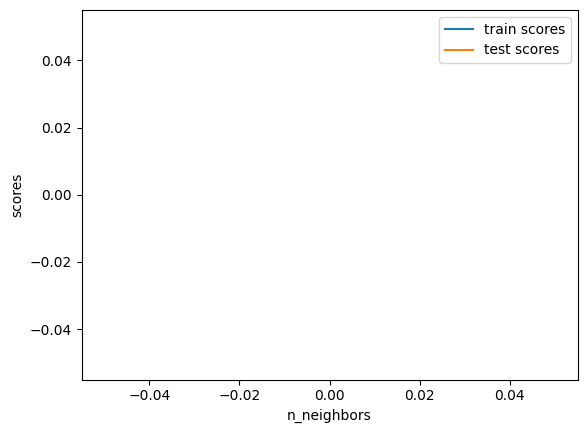

In [19]:
import pandas as pd
neighbors, train_scores, test_scores = np.array(neighbors), np.array(train_scores), np.array(test_scores)

fig, ax = plt.subplots()

ax.plot(neighbors, train_scores)
ax.plot(neighbors, test_scores)

classes = ['train scores', 'test scores']
ax.set_xlabel('n_neighbors')
ax.set_ylabel('scores')

plt.legend(classes)
plt.show()

In [20]:
# Train the model using the Decision Tree Algorithm
from sklearn import tree

In [21]:
classifier = tree.DecisionTreeClassifier()

In [22]:
classifier.fit(X=xTrain, y=yTrain)

DecisionTreeClassifier()

In [23]:
y_hat = classifier.predict(xTest)

In [24]:
y_hat.shape
y_hat_probs = classifier.predict_proba(xTest)

In [25]:
def get_accuracy(y_true, y_hat):
  return np.mean(y_true == y_hat)

In [26]:
get_accuracy(yTest, y_hat)

0.6341140079540433

In [27]:
# Train the model using the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

In [29]:
model.score(xTest, yTest)

0.8930623066725586

## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

In [30]:
# Evaluate the KNN Cluster model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn = knn.fit(xTrain, yTrain)

print('n neighbors = 1:')
print('train score:', knn.score(xTrain, yTrain))
print('test score:', knn.score(xTest, yTest))

n neighbors = 1:
train score: 0.9998895149707214
test score: 0.8179407865665046


In [31]:
# Evaluate the Decision Tree model
get_accuracy(yTest, y_hat)

0.6341140079540433

In [32]:
# Evaluate the Logistic Regression model
model.score(xTest, yTest)

0.8930623066725586

Discuss which one performs the best:

I was surprised to find that the Logistic Regression Model performed the best with a score of 0.88, with the Decision Tree Model at 0.64 and the KNN Model at 0.58.

I found that the KNN model clearly performed the best when n_neighbors was 1.

I tried to use the TfidfVectorizer, but it ran very, very slow. I suspect it would be faster on my machine than Colabs' free cloud computing, so I'll try that too.